## Jean-Eudes Rouffiac  

&nbsp;

&nbsp;

# <center> TP 2 : SVM </center>

L'objectif de ce TP est triple : 
* mise en œuvre des SVM pour la classification
* comparaison avec les méthodes LDA et régression logisitique
* test sur des problèmes de classification binaire et multi-classe

In [1]:
from __future__ import print_function
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import scipy.io as sio
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn import linear_model

%matplotlib inline

# 1 SVM linéaire



&nbsp;

## 1.1 Prise en main

&nbsp;

<p style="text-align:justify;"> Dans un premier temps, nous allons expliquer les différentes étapes du script *SimpleSVMLineaire.py*. 
Les lignes ci-dessous permettent de charger le dataset mixtureexample, de stocker dans deux variables X et Y les données des 2 variables explicatives ainsi que la classe correspondante.
On stocke aussi dans les variables "classes" et "nbpoints" le nom de la classe ainsi que le nombre de points qu'elle contient. On affiche alors toutes ces informations.</p>

<p style="text-align:justify;"> Dans un second temps, les données d'apprentissage sont séparées en données d'apprentissage et de validation car la méthode SVM fait intervenir un hyperparamètre $C$ qu'il faudra choisir. Enfin, les données sont normalisées.</p>

&nbsp;

In [2]:
#%% Dataset : Mixture of gaussian (disponible sur Moodle)
# Donnees apprentissage
data_a = sio.loadmat('./mixtureexampleTRAIN.mat')
Xa, Ya = data_a['Xa'], data_a['Ya'][:,0]
print('\nCaractéristiques jeu apprentissage : ')
print('Nombre de points : {}'.format(Xa.shape[0]))
print('Nombre de variables : {}'.format(Xa.shape[1]))
print('Nombre de classes : {} \n'.format(len(np.unique(Ya))))
classes, nbpoints = np.unique(Ya, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))


# Donnees test
data_t = sio.loadmat('./mixtureexampleTEST.mat')
Xt, Yt = data_t['Xt'], data_t['Yt'][:,0]
print('\nCaractéristiques jeu de test : ')
classes, nbpoints = np.unique(Yt, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))

#%% Decoupage des donnees app en jeu de validation et app
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5, stratify=Ya)


#%% Normalisation
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)


Caractéristiques jeu apprentissage : 
Nombre de points : 1000
Nombre de variables : 2
Nombre de classes : 2 

Classe -1 comprend 457 points
Classe 1 comprend 543 points

Caractéristiques jeu de test : 
Classe -1 comprend 94 points
Classe 1 comprend 107 points


&nbsp;

<p style="text-align:justify;"> La fonction suivante permet d'afficher les résultats. On peut voir les points avec leur couleur (classe) correpondante, la frontière de décision, ainsi que la marge.</p>

&nbsp;

In [3]:
def plot_decision_margin_2d(X, y, classifier, resolution=0.02, titre=' '):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0, X[:, 0].max() + 0
    x2_min, x2_max = X[:, 1].min() - 0, X[:, 1].max() + 0
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # margin
    Z = classifier.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    cs = plt.contour(xx1, xx2, Z, levels=[-1, 0, 1], colors=['r', 'g', 'b'], linewidths=2.5)
    plt.clabel(cs)
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.6, c=cmap(idx),
                    marker=markers[idx], label= 'classe {}'.format(cl))
    plt.legend(loc='best')
    plt.title(titre, fontsize=12)

&nbsp;

<p style="text-align:justify;">La fonction SVC de Sklearn est utilisée. Le paramètre C est passé en entrée ainsi que le noyau utilisé. Le noyau linéaire est utilisé. Les données d'apprentissage sont alors entraînées grâce au modèle. Le résultat est affiché graphiquement, puis le score en apprentissage et en test est affiché. </p>

&nbsp;


SVM Lineaire : erreur apprentissage = 0.15000000000000002
SVM Lineaire : erreur test = 0.17910447761194026


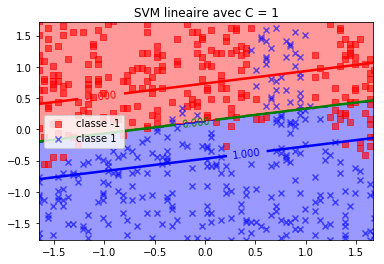

In [4]:
#%% 
# definition du modele SVM Lineaire
paramC = 1
clf_svm = SVC(kernel='linear', C = paramC)
# apprentissage des parametres du SVM Lineaire sur le jeu d'apprentissage
clf_svm.fit(Xa, Ya)

#%% Trace de la frontiere de decision et de la marge 
plot_decision_margin_2d(Xa, Ya, clf_svm, 0.02, titre='{} avec C = {}'.format("SVM lineaire", paramC))


#%% Erreur de classification en test du SVM Lineaire obtenu
err_app = 1 - accuracy_score(Ya, clf_svm.predict(Xa))
print('\nSVM Lineaire : erreur apprentissage = {}'.format(err_app))
err_test = 1 - accuracy_score(Yt, clf_svm.predict(Xt))
print('SVM Lineaire : erreur test = {}'.format(err_test))

&nbsp;

<p style="text-align:justify;">On peut voir que le taux d'erreur est assez élevé, en apprentissage et en test. On peut remarquer qu'une séparation linéaire n'est pas la meilleure méthode pour séparer les données que nous avons à disposition.</p>

<p style="text-align:justify;">On veut maintenant connaître l'influence du paramètre C sur la frontière de décision et la marge. Pour ce faire, nous répétons la méthode précédente en faisant varier le paramètre C. Nous affichons alors pour chaque valeur de C la figure correspondante.</p>

&nbsp;

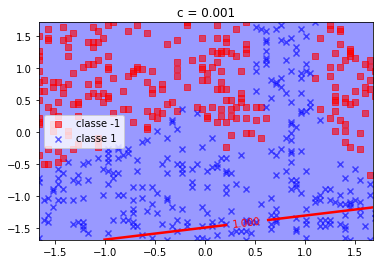

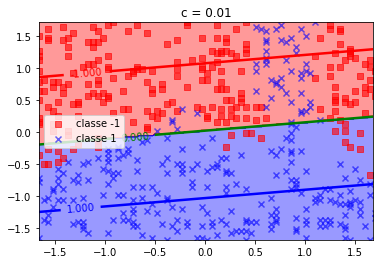

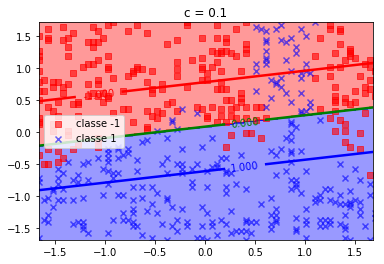

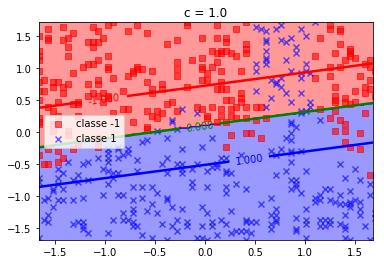

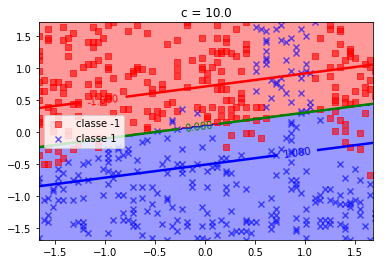

In [6]:
vectC = np.logspace(-3, 1, 5)
for paramC in vectC:
    clf_svm.C = paramC
    clf_svm.fit(Xa, Ya)
    plot_decision_margin_2d(Xa, Ya, clf_svm, 0.02, titre="c = {}".
    format(paramC))

&nbsp;

<p style="text-align:justify;">On remarque que pour des valeurs de C très petites ($10^{-3}$), la fontière de décision n'est pas du tout correct. Pour des valeurs de C de l'ordre de $10^{-2}$, la frontière de décision commence à se stabiliser mais la marge est grande. Finalement, plus C devient grand, plus la marge est petite mais pour des C plus grand que 1, la différence entre les marges est très petites.</p>

<p style="text-align:justify;">On veut maintenant chercher à trouver le C optimal qui va permettre de donner les meilleurs résultats. La valeur de C sera choisie entre $10^{-3}$ et $10^2$. Pour chaque valeur de C, un modèle est appris sur les données d'apprentissage et testé sur les données de validation, les scores en classification sont stockés dans un tableau. Une fois toutes les valeurs de C testées, le C optimal est celui qui minimise l'erreur en classification sur les données de validation. Un graphique représentant l'évolution de l'erreur en classification en fonction de la valeur de C pour les données d'apprentissage et données de validation est ensuite affiché. </p>

&nbsp;


 C optimal = 0.7196856730011522


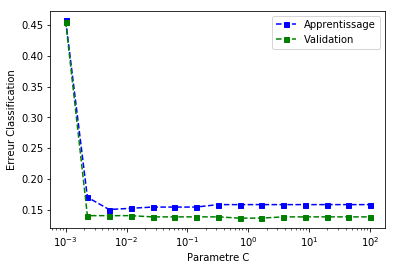

In [7]:
# Choix du C optimal par validation croisee
vectC = np.logspace(-3, 2, 15)
err_val = np.empty(vectC.shape[0])
err_app = np.empty(vectC.shape[0])
for ind_C, C in enumerate(vectC):
    clf_svm.C = C
    clf_svm.fit(Xa, Ya)
    
    # calcule erreur sur les donnees de validation et app
    err_val[ind_C] = 1 - accuracy_score(Yv, clf_svm.predict(Xv))
    err_app[ind_C] = 1 - accuracy_score(Ya, clf_svm.predict(Xa))
    
err_min_val, ind_min = err_val.min(), err_val.argmin()
Copt = vectC[ind_min]
print("\n C optimal = {}".format(Copt))

# Trace courbe erreur
plt.figure()
plt.semilogx(vectC, err_app, color="blue", linestyle="--", marker="s", markersize=5, label="Apprentissage")
plt.semilogx(vectC, err_val, color="green", linestyle="--", marker="s", markersize=5, label="Validation")
plt.xlabel("Parametre C")
plt.ylabel("Erreur Classification")
plt.legend(loc="best")
plt.show()

&nbsp;

<p style="text-align:justify;">Comme énoncé précemment, la frontière de décision pour des valeurs de C de l'ordre de $10^{-3}$ ne donnent pas de résultats corrects (45% d'erreur, en fait toutes les données sont attribuées à la même classe). Mais dès $C=0.05$, l'erreur en classification se stabilise à environ 17% pour les données de validation, et environ 14% pour les données d'apprentissage. </p>

<p style="text-align:justify;">La valeur de C optimale trouvée, il faut maintenant entraîner les données d'apprentissage avec un modèle SVM de paramètre C = C_optimal. Puis tester le modèle sur les données test. </p>

&nbsp;

In [8]:
# Apprentissage modele optimal et evaluation
clf_svm.C = Copt
clf_svm.fit(Xa, Ya)
err_app = 1 - accuracy_score(Ya, clf_svm.predict(Xa))
print("\nSVM Lineaire optimal : erreur apprentissage = {}".format(
err_app))
err_test = 1 - accuracy_score(Yt, clf_svm.predict(Xt))
print("SVM Lineaire optimal : erreur test = {}".format(err_test))


SVM Lineaire optimal : erreur apprentissage = 0.15800000000000003
SVM Lineaire optimal : erreur test = 0.17412935323383083


&nbsp;

<p style="text-align:justify;">Finalement, l'erreur sur les données test est de 17.4%, ce qui est un taux d'erreur important. </p>

&nbsp;



&nbsp;

## 1.2 Extension aux données CTG et Mnist

&nbsp;

<p style="text-align:justify;">Dans cette partie, nous allons utiliser la méthode SVM linéaire pour classifier les données de 2 jeux de données : CTGSimple et Mnist. Nous utiliserons le même protocole expérimental que pour la régression logistique et on déterminera le C optimal avec la méthode des Kfolds. On tracera les courbes de performance en apprentissage et en validation afin de repérer d'eventuelles défaillances dans notre modèle comme du sur apprentissage par exemple. On élaborera alors le modèle final avec le C optimal et on comparera la SVN linéaire avec la régression logistique.</p>

&nbsp;

### 1.2.1 Données CTG

<p style="text-align:justify;"> On commence par le dataset CTG. Les données sont les mêmes que pour le précédent TP. Nous utiliserons le même protocole, à savoir regrouper les classes 2 et 3. On split alors le dataset en 3 : données d'apprentissage, de validation, et de test. Puis on normalise les données.</p>

&nbsp;


In [65]:
df = pd.read_csv("./CTGSimple.csv", sep="\t",header=1)
Y = df["NSP"].values
variables = ["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV", "MSTV","ALTV","MLTV", "Width","Min","Max","Nmax", "Nzeros","Mode","Mean","Median","Variance","Tendency"]
X = df[variables].values

#Fusion des classes 2 et 3
classe = 3
Y[np.in1d(Y, classe)] = 2


# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.3, stratify=Y)

# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.3, stratify=Ya)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

&nbsp;

<p style="text-align:justify;"> Nous allons maintenant mettre en oeuvre la méthode de SVN linéaire. Pour ce faire, nous allons utiliser la méthode K folds comme vu et expliquée dans les TP précédents. Nous allons reprendre le même algorithme en l'adaptant à notre problème. Nous prendrons arbirairement $k=3$ comme paramètre de k folds. </p>


&nbsp;

Le C optimal est 0.061. 


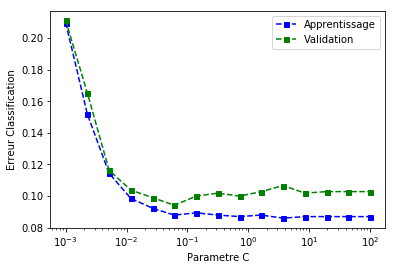

In [66]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
i = 1

vectC = np.logspace(-3, 2, 15)

perf_val = [[], [], []]
perf_app = [[], [], []]

decoupage = 0

clf_svm = SVC(kernel='linear', C = paramC)

for train , valid in kf.split(Xa):
    X_train = Xa[train,:]
    Y_train = Ya[train]
    X_valid = Xa[valid,:]
    Y_valid = Ya[valid]
    
    for c in vectC :
        clf_svm.C = c
        clf_svm.fit(X_train, Y_train)
        perf_val[decoupage].append(1 - accuracy_score(Y_valid, clf_svm.predict(X_valid)))
        perf_app[decoupage].append(1 - accuracy_score(Y_train, clf_svm.predict(X_train)))
    decoupage += 1
    
perf_globale_val = np.zeros((len(vectC), 1))
perf_globale_app = np.zeros((len(vectC), 1))

for i in range(0, len(vectC)):
    perf_globale_val[i] = perf_val[0][i] + perf_val[1][i] + perf_val[2][i]
    perf_globale_app[i] = perf_app[0][i] + perf_app[1][i] + perf_app[2][i]
    perf_globale_val[i] /= 3
    perf_globale_app[i] /= 3
    
c_opt = vectC[np.argmin(perf_globale_val)]
print('Le C optimal est %.3f. ' %c_opt)

# Trace courbe erreur
plt.figure()
plt.semilogx(vectC, perf_globale_app, color="blue", linestyle="--", marker="s", markersize=5, label="Apprentissage")
plt.semilogx(vectC, perf_globale_val, color="green", linestyle="--", marker="s", markersize=5, label="Validation")
plt.xlabel("Parametre C")
plt.ylabel("Erreur Classification")
plt.legend(loc="best")
plt.show()

&nbsp;

<p style="text-align:justify;">On alors trouvé le C optimal. Le graphique représentant l'évolution de l'erreur en classification sur les données test et validation montrent qu'à partir d'une valeur de C petite, l'erreur se stabilise.</p>


<p style="text-align:justify;">Elaborons maintenant le modèle final avec le C optimal et regardons les résultats. Nous reprendrons également le modèle final obtenu avec la régression logistique lors du TP2 pour comparer les résultats.</p>

&nbsp;

In [67]:
# Apprentissage modele optimal et evaluation SVN
clf_svm.C = Copt
clf_svm.fit(Xa, Ya)
err_app = 1 - accuracy_score(Ya, clf_svm.predict(Xa))
print("\nSVM Lineaire optimal : erreur apprentissage = {}".format(100*err_app))
err_test = 1 - accuracy_score(Yt, clf_svm.predict(Xt))
print("SVM Lineaire optimal : erreur test = {}".format(100*err_test))

print("\n")
# Apprentissage modele optimal et evaluation Regression logistique
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
clf_reglog.C = 0.061
clf_reglog.fit(Xa, Ya)

print('Err classification en apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))
print('Err classification en test correspondante = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog.predict(Xt)))))



SVM Lineaire optimal : erreur apprentissage = 8.837656099903935
SVM Lineaire optimal : erreur test = 10.344827586206895


Err classification en apprentissage correspondante = 8.741594620557159
Err classification en test correspondante = 10.031347962382442


&nbsp;

<p style="text-align:justify;">L'erreur de classification sur les données CTG est donc d'environ 10.3% pour la méthode SVN linéaire. Ce résultat est similaire à la régression logistique car le score est aussi d'environ 10%.</p>


<p style="text-align:justify;">Affichons les matrices de confusion pour les deux méthodes.</p>

&nbsp;

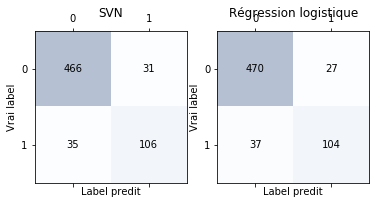

In [68]:
from sklearn.metrics import confusion_matrix


ypred_test_reglog = clf_reglog.predict(Xt)
ypred_test_svn = clf_svm.predict(Xt)

# matrices de confusion
confmat1 = confusion_matrix(y_true=Yt, y_pred=ypred_test_svn)
confmat2 = confusion_matrix(y_true=Yt, y_pred=ypred_test_reglog)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(confmat1, cmap=plt.cm.Blues, alpha=0.3)
ax2.matshow(confmat2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat1.shape[0]):
    for j in range(confmat1.shape[1]):
        ax1.text(x=j, y=i, s=confmat1[i, j], va="center", ha="center")
ax1.set(xlabel='Label predit', ylabel='Vrai label')
ax1.set_title('SVN')

for i in range(confmat2.shape[0]):
    for j in range(confmat2.shape[1]):
        ax2.text(x=j, y=i, s=confmat2[i, j], va="center", ha="center")
ax2.set(xlabel='Label predit', ylabel='Vrai label')
ax2.set_title('Régression logistique')

plt.show()

&nbsp;

<p style="text-align:justify;">On remarque que les deux modèles ont des performances très proches.</p>


&nbsp;

&nbsp;

### 1.2.1 Données MNIST

<p style="text-align:justify;"> Nous allons maintenant utiliser le dataset MNIST. Cette fois nous ne sommes plus dans la classificatio binaire mais dans une classification multi classe car il y a 10 classes à prédire, les chiffres de 0 à 9. Nous utiliserons le même protocole que pour la régression logistique donc nous enlevons du modèle les variables ayant une faible variance. Cela permet de réduire le nombre de données et surtout de pouvoir comparer la méthode SVN avec les mêmes données que la régression logistique.</p>

&nbsp;


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


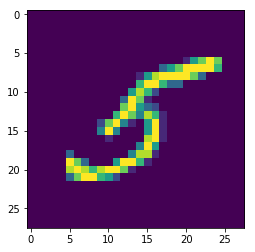

In [3]:
# Chargement des donnees
digits_app = sio.loadmat("mnist-app.mat")
Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]
digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]

plt.imshow(Xa[35].reshape(28,28))

tol = 1e-3
std_a = np.std(Xa, 0)
idx_var = np.squeeze(np.where(std_a > tol))
Xa = Xa[:, idx_var]
Xt = Xt[:, idx_var]

# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.8, stratify=Ya)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

&nbsp;

<p style="text-align:justify;"> On va utiliser une validation croisée pour trouver le C optimal.</p>

&nbsp;

0.001
0.0022758459260747888
0.005179474679231213
0.011787686347935873
0.02682695795279726
0.0610540229658533
0.13894954943731375
0.31622776601683794
0.7196856730011522
1.6378937069540647
3.7275937203149416
8.483428982440726
19.306977288832496
43.93970560760795
100.0

 C optimal = 0.005179474679231213


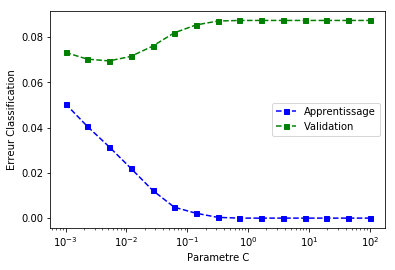

In [4]:
# Choix du C optimal par validation croisee
vectC = np.logspace(-3, 2, 15)
err_val = np.empty(vectC.shape[0])
err_app = np.empty(vectC.shape[0])
clf_svm = SVC(kernel='linear', cache_size = 1500)
for ind_C, C in enumerate(vectC):
    print(C)
    clf_svm.C = C
    clf_svm.fit(Xa, Ya)
    
    # calcule erreur sur les donnees de validation et app
    err_val[ind_C] = 1 - accuracy_score(Yv, clf_svm.predict(Xv))
    err_app[ind_C] = 1 - accuracy_score(Ya, clf_svm.predict(Xa))
    
err_min_val, ind_min = err_val.min(), err_val.argmin()
Copt = vectC[ind_min]
print("\n C optimal = {}".format(Copt))

# Trace courbe erreur
plt.figure()
plt.semilogx(vectC, err_app, color="blue", linestyle="--", marker="s", markersize=5, label="Apprentissage")
plt.semilogx(vectC, err_val, color="green", linestyle="--", marker="s", markersize=5, label="Validation")
plt.xlabel("Parametre C")
plt.ylabel("Erreur Classification")
plt.legend(loc="best")
plt.show()

&nbsp;

<p style="text-align:justify;">On alors trouvé le C optimal. Le graphique représentant l'évolution de l'erreur en classification sur les données test et validation montrent qu'à partir d'une valeur de C petite, l'erreur se stabilise. On remarque cependant un sur apprentissage, dû nottament au split entre le jeu de données d'apprentissage et le jeu de données validation (12000 pour apprentissage).</p>


<p style="text-align:justify;">Elaborons maintenant le modèle final avec le C optimal et regardons les résultats. Nous reprendrons également le modèle final obtenu avec la régression logistique lors du TP2 pour comparer les résultats.</p>

&nbsp;

In [5]:
# Apprentissage modele optimal et evaluation SVN
clf_svm = SVC(kernel='linear', cache_size = 1500)
clf_svm.C = Copt
clf_svm.fit(Xa, Ya)
err_app = 1 - accuracy_score(Ya, clf_svm.predict(Xa))
print("\nSVM Lineaire optimal : erreur apprentissage = {}".format(100*err_app))
err_test = 1 - accuracy_score(Yt, clf_svm.predict(Xt))
print("SVM Lineaire optimal : erreur test = {}".format(100*err_test))

print("\n")
# Apprentissage modele optimal et evaluation Regression logistique
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
clf_reglog.C = 0.0023
clf_reglog.fit(Xa, Ya)

print('Err classification en apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))
print('Err classification en test correspondante = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog.predict(Xt)))))



SVM Lineaire optimal : erreur apprentissage = 3.1583333333333297
SVM Lineaire optimal : erreur test = 6.730000000000002


Err classification en apprentissage correspondante = 7.0749999999999975
Err classification en test correspondante = 8.940000000000003


&nbsp;

<p style="text-align:justify;">On obtient donc un score très satisfaisant sur l'échantillon test avec la SVN mais avec un temps de calcul très long... Alors que la régréssion logistique s'exécute très vite. Pour comparer les deux méthodes nous avons pris le même nombre de données, mais avec la régression logistique on aurait pu entraîner notre modèle sur les 60000 données assez rapidement ce qui aurait donné un meilleur résultat.</p>


<p style="text-align:justify;">Regardons maintenant les matrices de confusion.</p>

&nbsp;

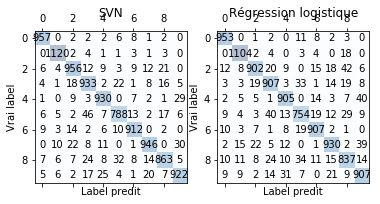

In [6]:
from sklearn.metrics import confusion_matrix


ypred_test_reglog = clf_reglog.predict(Xt)
ypred_test_svn = clf_svm.predict(Xt)

# matrices de confusion
confmat1 = confusion_matrix(y_true=Yt, y_pred=ypred_test_svn)
confmat2 = confusion_matrix(y_true=Yt, y_pred=ypred_test_reglog)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(confmat1, cmap=plt.cm.Blues, alpha=0.3)
ax2.matshow(confmat2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat1.shape[0]):
    for j in range(confmat1.shape[1]):
        ax1.text(x=j, y=i, s=confmat1[i, j], va="center", ha="center")
ax1.set(xlabel='Label predit', ylabel='Vrai label')
ax1.set_title('SVN')

for i in range(confmat2.shape[0]):
    for j in range(confmat2.shape[1]):
        ax2.text(x=j, y=i, s=confmat2[i, j], va="center", ha="center")
ax2.set(xlabel='Label predit', ylabel='Vrai label')
ax2.set_title('Régression logistique')

plt.show()



&nbsp;

# 2. SVM non linéaire

&nbsp;

<p style="text-align:justify;"> Le script SimpleSVMKernel.py implémente un SVM avec un noyau gaussien de paramètre $\gamma$ : $k(x, z) = exp(−\gamma \lVert x − z \rVert^2)$.</p>

<p style="text-align:justify;"> Dans un premier temps, on test le script et compare les résultats à ceux du SVM linéaire.</p>

&nbsp;

In [5]:
data_a = sio.loadmat('./mixtureexampleTRAIN.mat')
Xa, Ya = data_a['Xa'], data_a['Ya'][:,0]
print('\nCaractéristiques jeu apprentissage : ')
print('Nombre de points : {}'.format(Xa.shape[0]))
print('Nombre de variables : {}'.format(Xa.shape[1]))
print('Nombre de classes : {}'.format(len(np.unique(Ya))))
classes, nbpoints = np.unique(Ya, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))


# Donnees test
data_t = sio.loadmat('./mixtureexampleTEST.mat')
Xt, Yt = data_t['Xt'], data_t['Yt'][:,0]
print('\nCaractéristiques jeu de test : ')
classes, nbpoints = np.unique(Yt, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))

#%% Decoupage des donnees app en jeu de validation et app
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5, stratify=Ya)


#%% Normalisation
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)


Caractéristiques jeu apprentissage : 
Nombre de points : 1000
Nombre de variables : 2
Nombre de classes : 2
Classe -1 comprend 457 points
Classe 1 comprend 543 points

Caractéristiques jeu de test : 
Classe -1 comprend 94 points
Classe 1 comprend 107 points


&nbsp;

<p style="text-align:justify;"> La méthode est la même que pour la partie précédente sauf qu'au lieu d'utiliser le kernel "linear", on utilise le kernel "rbf" qui correspond à un noyau gaussien. En plus du paramètre C, il y a maintenant un paramètre $\gamma$. Ci-dessous, la fonction SVC avec le noyau gaussien est appelé avec C et gamma fixés à 1.</p>


&nbsp;


SVM kernel : erreur apprentissage = 0.040000000000000036
SVM kernel : erreur test = 0.06965174129353235


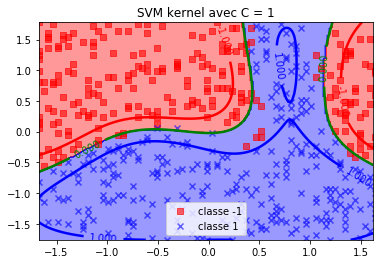

In [26]:
#%% 
# definition du modele SVM Lineaire
paramC = 1
paramKer = 1
clf_ker = SVC(kernel='rbf', C = paramC, gamma=paramKer)
# apprentissage des parametres du SVM Lineaire sur le jeu d'apprentissage
clf_ker.fit(Xa, Ya)

#%% Trace de la frontiere de decision et de la marge 
plot_decision_margin_2d(Xa, Ya, clf_ker, 0.02, titre='{} avec C = {}'.format("SVM kernel", paramC))


#%% Erreur de classification en test du SVM Lineaire obtenu
err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print('\nSVM kernel : erreur apprentissage = {}'.format(err_app))
err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print('SVM kernel : erreur test = {}'.format(err_test))

&nbsp;

<p style="text-align:justify;"> On va maintenant fixer gamma à 1 mais faire varier C pour voir l'influence de C sur lea frontière de décision et la marge.</p>


&nbsp;

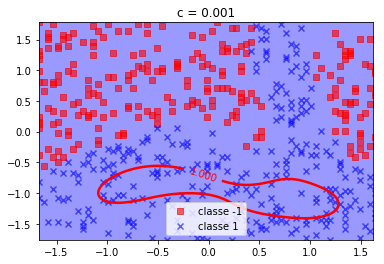

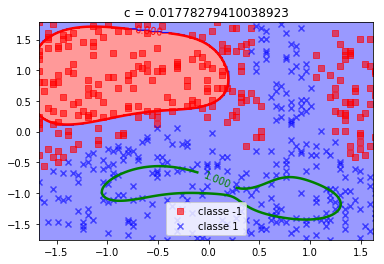

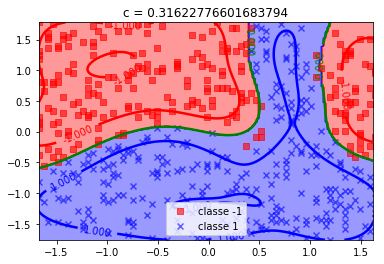

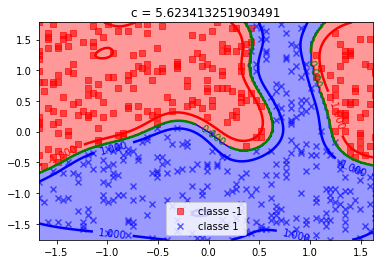

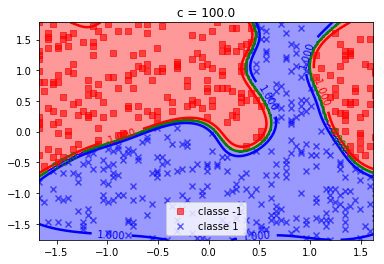

In [36]:
vectC = np.logspace(-3, 2, 5)
for paramC in vectC:
    clf_ker.C = paramC
    clf_ker.fit(Xa, Ya)
    plot_decision_margin_2d(Xa, Ya, clf_ker, 0.02, titre="c = {}".
    format(paramC))

&nbsp;

<p style="text-align:justify;"> On observe que plus C augmente, plus la marge diminue. La frontière de décision semble correct dès C = 0.3.</p>

&nbsp;

<p style="text-align:justify;"> On va maintenant fixer C à 1 mais faire varier gamma pour voir l'influence de gamma sur lea frontière de décision et la marge.</p>


&nbsp;

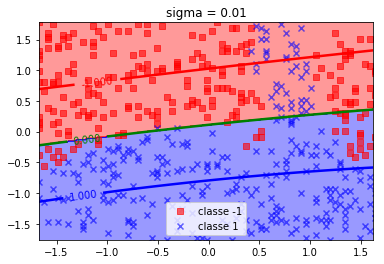

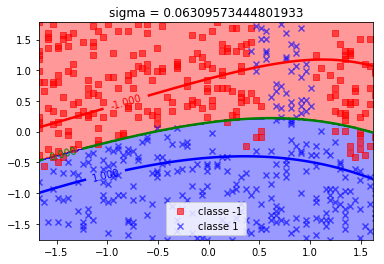

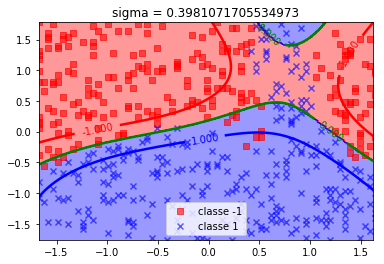

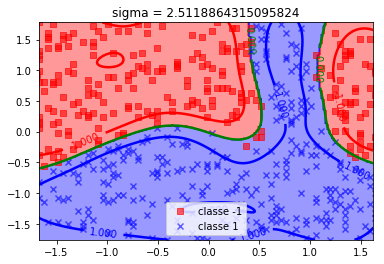

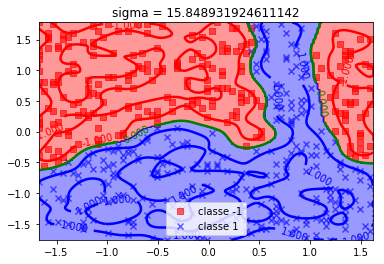

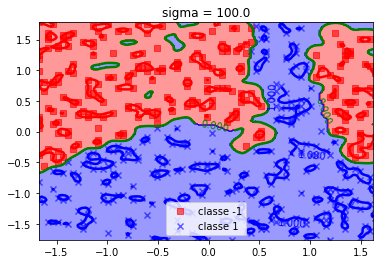

In [37]:
clf_ker.C = 1
vectGamma = np.logspace(-2, 2, 6)
for paramKer in vectGamma:
    clf_ker.gamma = paramKer
    clf_ker.fit(Xa, Ya)
    plot_decision_margin_2d(Xa, Ya, clf_ker, 0.02, titre="sigma = {}".format(paramKer))

&nbsp;

<p style="text-align:justify;"> On observe que plus sigma augmente, plus il y a du sur-apprentissage car la frontière devient de moins en moins lisse et la marge de plus en plus grande.</p>

&nbsp;

<p style="text-align:justify;"> On a donc vu que la solution du SVM dépend des hyper-paramètres C et $\gamma$. On va alors utiliser une recherche en grille qui consiste à explorer des plages pré-définies des hyper-paramètres et pour chaque paire (C, $\gamma$), on apprend le modèle SVM et on évalue ses performances sur les données de validation.</p>


&nbsp;


- Apprentissage du SVM pour C =  0.001 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  0.010 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  0.100 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  1.000 
	 Apprentissage du SVM pour gamma =   0.01 
	 Ap

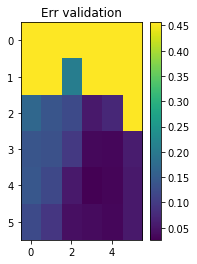

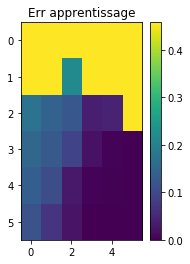

In [38]:
# Grid search (exploration des plages de valeurs de C et gamma)
vectC = np.logspace(-3, 2, 6)
vectGamma = np.logspace(-2, 2, 6)
err_val = np.empty((vectC.shape[0], vectGamma.shape[0]))
err_app = np.empty((vectC.shape[0], vectGamma.shape[0]))
for ind_C, C in enumerate(vectC):
    print("- Apprentissage du SVM pour C = {:6.3f} ".format(C))
    clf_ker.C = C
    for ind_gam, paramKer in enumerate(vectGamma):
        print("\t Apprentissage du SVM pour gamma = {:6.2f} ".format(paramKer))
        clf_ker.gamma = paramKer
        clf_ker.fit(Xa, Ya)
        err_val[ind_C, ind_gam] = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
        err_app[ind_C, ind_gam] = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
        
plt.subplot(121)
plt.imshow(err_val, aspect="auto")
plt.title("Err validation")
plt.colorbar()
plt.show()
plt.subplot(122)
plt.imshow(err_app, aspect="auto")
plt.title("Err apprentissage")
plt.colorbar()
plt.show()

In [39]:
ind_C, ind_gamma = np.unravel_index(np.argmin(err_val), err_val.shape)
Copt = vectC[ind_C]
GammaOpt = vectGamma[ind_gamma]
print("Gamma optimal : %f" %(GammaOpt))
print("C optimal : %f" %(Copt))

Gamma optimal : 2.511886
C optimal : 10.000000


&nbsp;

<p style="text-align:justify;"> Le gamma optimal est donc de 2.5 et le C optimal est de 10. On peut alors créer un modèle SVM non linéaire avec ces hyper paramètres optimaux.</p>

&nbsp;

In [40]:
# Apprentissage modele optimal et evaluation
clf_ker.C = Copt
clf_ker.gamma = GammaOpt
clf_ker.fit(Xa, Ya)
err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print("\nSVM kernel optimal : erreur apprentissage = {}%".format
(100*err_app))
err_val = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
print("SVM kernel optimal : erreur validation = {}%".format(100*
err_val))
err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print("SVM kernel optimal : erreur test = {}%".format(100*err_test))


SVM kernel optimal : erreur apprentissage = 0.40000000000000036%
SVM kernel optimal : erreur validation = 2.6000000000000023%
SVM kernel optimal : erreur test = 2.487562189054726%


&nbsp;

<p style="text-align:justify;"> On trouve donc un résultat en test de 2.4%, ce qui est largement mieux que pour la SVM linéaire où nous avions obtenu 17% d'erreur sur l'échantillon test.</p>

&nbsp;

&nbsp;

### SVM avec noyau polynomial

&nbsp;

<p style="text-align:justify;">Nous allons maintenant changer de noyau en prenant en prenant un noyau polynomial de degré d : $k(x,z) = (1+x^Tz)^d$. On applique la même méthode que précemment.</p>

<p style="text-align:justify;">Le noyau polynomial de SKlearn est de la forme suivante : $(\gamma xz + r)^d$. d est le degré, et r est le coef0 (paramètre de la fonction SVM). Dans notre cas $r=1$.</p>


&nbsp;


SVM kernel : erreur apprentissage = 0.06599999999999995
SVM kernel : erreur test = 0.07960199004975121


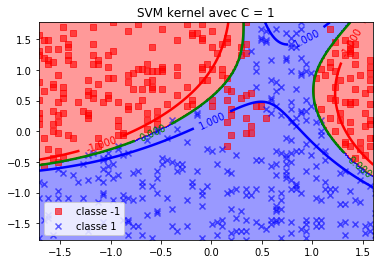

In [6]:
# definition du modele SVM Lineaire
paramC = 1
paramdegree = 3
clf_ker = SVC(kernel='poly', C = paramC, degree = paramdegree, coef0 = 1)
# apprentissage des parametres du SVM Lineaire sur le jeu d'apprentissage
clf_ker.fit(Xa, Ya)

#%% Trace de la frontiere de decision et de la marge 
plot_decision_margin_2d(Xa, Ya, clf_ker, 0.02, titre='{} avec C = {}'.format("SVM kernel", paramC))


#%% Erreur de classification en test du SVM Lineaire obtenu
err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print('\nSVM kernel : erreur apprentissage = {}'.format(err_app))
err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print('SVM kernel : erreur test = {}'.format(err_test))

&nbsp;

<p style="text-align:justify;">Utilisons une grid search pour trouver les paramètres C et d optimaux.</p>


&nbsp;

- Apprentissage du SVM pour C =  0.001 
	 Apprentissage du SVM pour degree =   1.00 
	 Apprentissage du SVM pour degree =   3.11 
	 Apprentissage du SVM pour degree =   5.22 
	 Apprentissage du SVM pour degree =   7.33 
	 Apprentissage du SVM pour degree =   9.44 
	 Apprentissage du SVM pour degree =  11.56 
	 Apprentissage du SVM pour degree =  13.67 
	 Apprentissage du SVM pour degree =  15.78 
	 Apprentissage du SVM pour degree =  17.89 
	 Apprentissage du SVM pour degree =  20.00 
- Apprentissage du SVM pour C =  0.010 
	 Apprentissage du SVM pour degree =   1.00 
	 Apprentissage du SVM pour degree =   3.11 
	 Apprentissage du SVM pour degree =   5.22 
	 Apprentissage du SVM pour degree =   7.33 
	 Apprentissage du SVM pour degree =   9.44 
	 Apprentissage du SVM pour degree =  11.56 
	 Apprentissage du SVM pour degree =  13.67 
	 Apprentissage du SVM pour degree =  15.78 
	 Apprentissage du SVM pour degree =  17.89 
	 Apprentissage du SVM pour degree =  20.00 
- Apprentissage du S

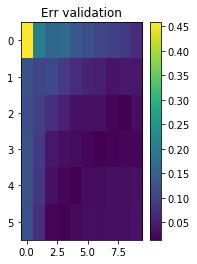

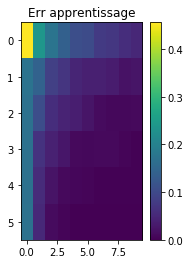

In [12]:
# Grid search (exploration des plages de valeurs de C et gamma)
vectC = np.logspace(-3, 2, 6)
vectd = np.linspace(1,20,10)
err_val = np.empty((vectC.shape[0], vectd.shape[0]))
err_app = np.empty((vectC.shape[0], vectd.shape[0]))
for ind_C, C in enumerate(vectC):
    print("- Apprentissage du SVM pour C = {:6.3f} ".format(C))
    clf_ker.C = C
    for ind_gam, paramD in enumerate(vectd):
        print("\t Apprentissage du SVM pour degree = {:6.2f} ".format(paramD))
        clf_ker.degree = paramD
        clf_ker.fit(Xa, Ya)
        err_val[ind_C, ind_gam] = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
        err_app[ind_C, ind_gam] = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
        
plt.subplot(121)
plt.imshow(err_val, aspect="auto")
plt.title("Err validation")
plt.colorbar()
plt.show()
plt.subplot(122)
plt.imshow(err_app, aspect="auto")
plt.title("Err apprentissage")
plt.colorbar()
plt.show()

In [14]:
ind_C, ind_degree = np.unravel_index(np.argmin(err_val), err_val.shape)
Copt = vectC[ind_C]
dOpt = vectd[ind_degree]
print("d optimal : %f" %(dOpt))
print("C optimal : %f" %(Copt))

d optimal : 13.666667
C optimal : 1.000000


&nbsp;

<p style="text-align:justify;">Utilisons maintenant les paramètres optimaux pour créer notre modèle et regardons ses erreurs en classification.</p>


&nbsp;

In [15]:
# Apprentissage modele optimal et evaluation
clf_ker.C = Copt
clf_ker.degree = dOpt
clf_ker.fit(Xa, Ya)
err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print("\nSVM kernel optimal : erreur apprentissage = {}%".format
(100*err_app))
err_val = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
print("SVM kernel optimal : erreur validation = {}%".format(100*
err_val))
err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print("SVM kernel optimal : erreur test = {}%".format(100*err_test))


SVM kernel optimal : erreur apprentissage = 1.200000000000001%
SVM kernel optimal : erreur validation = 1.4000000000000012%
SVM kernel optimal : erreur test = 1.9900497512437831%


&nbsp;

<p style="text-align:justify;">Nous trouvons alors en test un taux d'erreur de 1.99%, ce qui est mieux que le SVN avec le noyau Gaussien (on avait obtenu 2.5%).</p>


&nbsp;

&nbsp;

## 2.1 Extension du SVM non linéaire aux données CTG et MNIST

&nbsp;

<p style="text-align:justify;">Nous allons mettre en oeuvre un SVM avec un noyau gaussien sur ces deux datasets. On cherchera les meilleurs hyper paramètres $C$ et $\lambda$, puis nous élaborerons le modèle et comparerons les performances en classification avec celles du SVM linéaire.</p>

###  CTG 

<p style="text-align:justify;">Commençons par les données du dataset CTG. Chargeons les données et cherchons les paramètres optimaux.</p>

&nbsp;


In [61]:
df = pd.read_csv("./CTGSimple.csv", sep="\t",header=1)
Y = df["NSP"].values
variables = ["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV", "MSTV","ALTV","MLTV", "Width","Min","Max","Nmax", "Nzeros","Mode","Mean","Median","Variance","Tendency"]
X = df[variables].values

#Fusion des classes 2 et 3
classe = 3
Y[np.in1d(Y, classe)] = 2


# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.3, stratify=Y)

# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.3, stratify=Ya)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

- Apprentissage du SVM pour C =  0.001 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  0.010 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  0.100 
	 Apprentissage du SVM pour gamma =   0.01 
	 Apprentissage du SVM pour gamma =   0.06 
	 Apprentissage du SVM pour gamma =   0.40 
	 Apprentissage du SVM pour gamma =   2.51 
	 Apprentissage du SVM pour gamma =  15.85 
	 Apprentissage du SVM pour gamma = 100.00 
- Apprentissage du SVM pour C =  1.000 
	 Apprentissage du SVM pour gamma =   0.01 
	 Ap

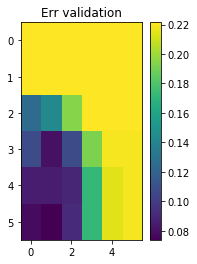

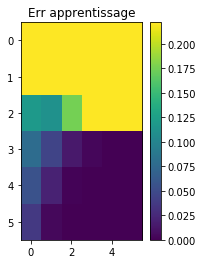

In [62]:
# Grid search (exploration des plages de valeurs de C et gamma)
clf_ker = SVC(kernel='rbf')

vectC = np.logspace(-3, 2, 6)
vectGamma = np.logspace(-2, 2, 6)
err_val = np.empty((vectC.shape[0], vectGamma.shape[0]))
err_app = np.empty((vectC.shape[0], vectGamma.shape[0]))
for ind_C, C in enumerate(vectC):
    print("- Apprentissage du SVM pour C = {:6.3f} ".format(C))
    clf_ker.C = C
    for ind_gam, paramKer in enumerate(vectGamma):
        print("\t Apprentissage du SVM pour gamma = {:6.2f} ".format(paramKer))
        clf_ker.gamma = paramKer
        clf_ker.fit(Xa, Ya)
        err_val[ind_C, ind_gam] = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
        err_app[ind_C, ind_gam] = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
        
plt.subplot(121)
plt.imshow(err_val, aspect="auto")
plt.title("Err validation")
plt.colorbar()
plt.show()
plt.subplot(122)
plt.imshow(err_app, aspect="auto")
plt.title("Err apprentissage")
plt.colorbar()
plt.show()

In [63]:
ind_C, ind_gamma = np.unravel_index(np.argmin(err_val), err_val.shape)
Copt = vectC[ind_C]
GammaOpt = vectGamma[ind_gamma]
print("Gamma optimal : %f" %(GammaOpt))
print("C optimal : %f" %(Copt))

Gamma optimal : 0.063096
C optimal : 100.000000


In [64]:
# Apprentissage modele optimal et evaluation
clf_ker.C = Copt
clf_ker.gamma = GammaOpt
clf_ker.fit(Xa, Ya)
err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print("\nSVM kernel optimal : erreur apprentissage = {}%".format
(100*err_app))
err_val = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
print("SVM kernel optimal : erreur validation = {}%".format(100*
err_val))
err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print("SVM kernel optimal : erreur test = {}%".format(100*err_test))


SVM kernel optimal : erreur apprentissage = 0.4803073967339144%
SVM kernel optimal : erreur validation = 7.38255033557047%
SVM kernel optimal : erreur test = 7.366771159874608%


&nbsp;

<p style="text-align:justify;"> On obtient alors de meilleurs résultats que pour la SVN linéaire puisque nous avions obtenu 9.5% d'erreur en test.</p>

&nbsp;

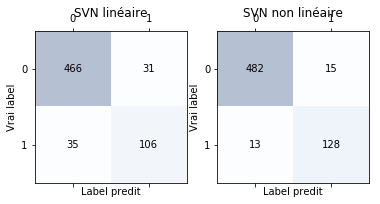

In [69]:
from sklearn.metrics import confusion_matrix


ypred_test_svn_gauss = clf_ker.predict(Xt)

# matrices de confusion
confmat3 = confusion_matrix(y_true=Yt, y_pred=ypred_test_svn_gauss)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(confmat1, cmap=plt.cm.Blues, alpha=0.3)
ax2.matshow(confmat3, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat1.shape[0]):
    for j in range(confmat1.shape[1]):
        ax1.text(x=j, y=i, s=confmat1[i, j], va="center", ha="center")
ax1.set(xlabel='Label predit', ylabel='Vrai label')
ax1.set_title('SVN linéaire')

for i in range(confmat3.shape[0]):
    for j in range(confmat3.shape[1]):
        ax2.text(x=j, y=i, s=confmat3[i, j], va="center", ha="center")
ax2.set(xlabel='Label predit', ylabel='Vrai label')
ax2.set_title('SVN non linéaire')

plt.show()

&nbsp;

<p style="text-align:justify;">On affiche les matrices de confusion pour la SVN linéaire et non linéaire. La SVN non linéaire a largement diminué les faux négatifs (divisé par 3). Les faux positifs ont été diminués par 2.</p>

&nbsp;

###  MNIST

<p style="text-align:justify;">Regardons maintenant les données MNIST.</p>

&nbsp;

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


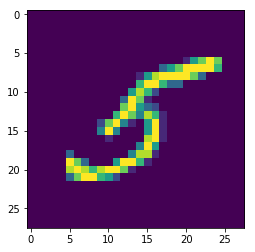

In [72]:
# Chargement des donnees
digits_app = sio.loadmat("mnist-app.mat")
Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]
digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]

plt.imshow(Xa[35].reshape(28,28))

tol = 1e-3
std_a = np.std(Xa, 0)
idx_var = np.squeeze(np.where(std_a > tol))
Xa = Xa[:, idx_var]
Xt = Xt[:, idx_var]

# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.7, stratify=Ya)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

&nbsp;

<p style="text-align:justify;">On aurait pu chercher les paramètres optimaux comme précédemment, mais malheuresemnt le temps de calcul est vraiment trop long, même avec un nombre de données dans l'échantillon d'apprentissage de l'ordre de 10 000. Mais la méthode reste exactement la même avec la grid search. Finalement, nous prenons comme paramètres $C=5$ et $\gamma = 0.005$. </p>

&nbsp;

In [73]:
# Apprentissage modele optimal et evaluation
clf_ker = SVC(kernel='rbf',  cache_size = 1500)

clf_ker.C = 5
clf_ker.gamma = 0.005
clf_ker.fit(Xa, Ya)
err_app = 1 - accuracy_score(Ya, clf_ker.predict(Xa))
print("\nSVM kernel optimal : erreur apprentissage = {}%".format(100*err_app))
err_val = 1 - accuracy_score(Yv, clf_ker.predict(Xv))
print("SVM kernel optimal : erreur validation = {}%".format(100*err_val))
err_test = 1 - accuracy_score(Yt, clf_ker.predict(Xt))
print("SVM kernel optimal : erreur test = {}%".format(100*err_test))


SVM kernel optimal : erreur apprentissage = 0.0%
SVM kernel optimal : erreur validation = 8.152380952380955%
SVM kernel optimal : erreur test = 7.77%


&nbsp;

<p style="text-align:justify;">On obtient alors un score de 7.77%. Notons que si on avait pris l'ensemble de l'échantillon d'apprentissage, on aurait eu un taux d'erreur d'environ 5%, ce qui est légèrement mieux que pour la SVM linéaire. </p>

&nbsp;